### MNIST Logistic Regression Training and Evaluation

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.transforms import ToTensor
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
# Downloading and preparing the MNIST dataset
dataset = MNIST(root='data/', download=True, transform=ToTensor())

# Splitting the MNIST dataset into training, validation, and test sets
train_ds, remaining = random_split(dataset, [50000, 10000])
val_ds, test_ds = random_split(remaining, [5000, 5000])

batch_size = 128
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)
test_loader = DataLoader(test_ds, batch_size)

In [3]:
input_size = 28*28
num_classes = 10

# Defining the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = LogisticRegressionModel()

In [4]:
# Defining the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [5]:
# Training the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/10, Loss: 1.9252506494522095
Epoch 2/10, Loss: 1.719164252281189
Epoch 3/10, Loss: 1.5156946182250977
Epoch 4/10, Loss: 1.3535605669021606
Epoch 5/10, Loss: 1.1588252782821655
Epoch 6/10, Loss: 1.1687657833099365
Epoch 7/10, Loss: 1.0401642322540283
Epoch 8/10, Loss: 0.9746638536453247
Epoch 9/10, Loss: 0.9601337313652039
Epoch 10/10, Loss: 0.8685754537582397


In [6]:
# Evaluating the model on the validation set
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the validation images: {100 * correct / total}%')

Accuracy of the model on the validation images: 82.48%


### Adam Optimizer and Training

In [7]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epochs = 20  # Increase from 10 to 20

loss_values = [] 

for epoch in range(num_epochs):
    total_loss = 0
    for i, (images, labels) in enumerate(train_loader):  
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        
    avg_loss = total_loss / len(train_loader) 
    loss_values.append(avg_loss) 
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss}')

Epoch 1/20, Loss: 0.481197917629081
Epoch 2/20, Loss: 0.3417215407885554
Epoch 3/20, Loss: 0.31016709512609353
Epoch 4/20, Loss: 0.29364806916707614
Epoch 5/20, Loss: 0.2841315412193613
Epoch 6/20, Loss: 0.2765914585889148
Epoch 7/20, Loss: 0.2710298811993026
Epoch 8/20, Loss: 0.26687070933144413
Epoch 9/20, Loss: 0.2632185094382452
Epoch 10/20, Loss: 0.25993838334632346
Epoch 11/20, Loss: 0.2574852350194131
Epoch 12/20, Loss: 0.25481831128030175
Epoch 13/20, Loss: 0.2527453116405651
Epoch 14/20, Loss: 0.2510853243986969
Epoch 15/20, Loss: 0.2493572890415521
Epoch 16/20, Loss: 0.24766123437744272
Epoch 17/20, Loss: 0.24636390513699988
Epoch 18/20, Loss: 0.24489778632779255
Epoch 19/20, Loss: 0.24391458301669192
Epoch 20/20, Loss: 0.2426490298355632


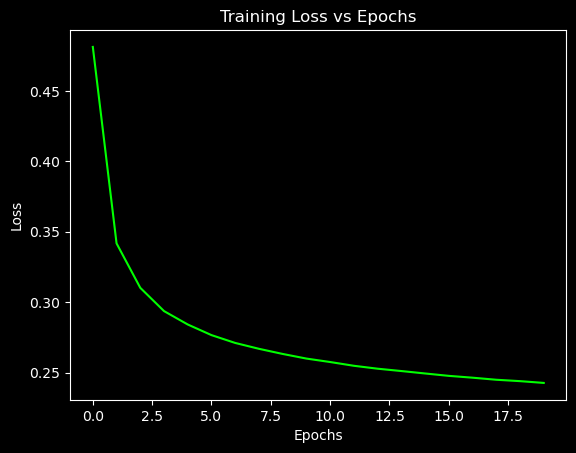

In [8]:
plt.style.use('dark_background')
plt.title("Training Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(loss_values, color='lime')
plt.show()

The model's loss decreases over time, which indicates that the model is learning from the training data.

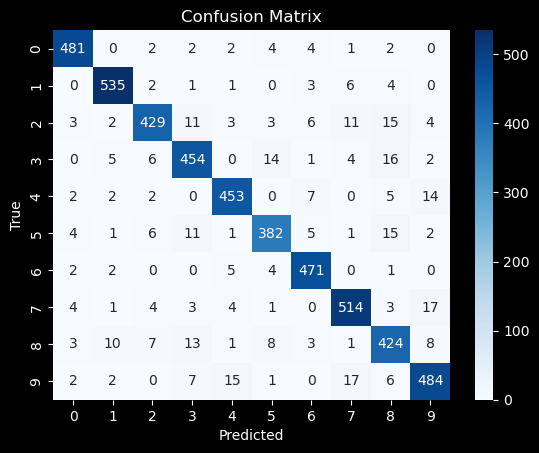

In [9]:
model.eval()  # Set the model to evaluation mode

y_pred = []
y_true = []

with torch.no_grad():
    for images, labels in test_loader:  # Use test_loader instead of val_loader
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        y_pred.extend(predicted.tolist())
        y_true.extend(labels.tolist())

cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

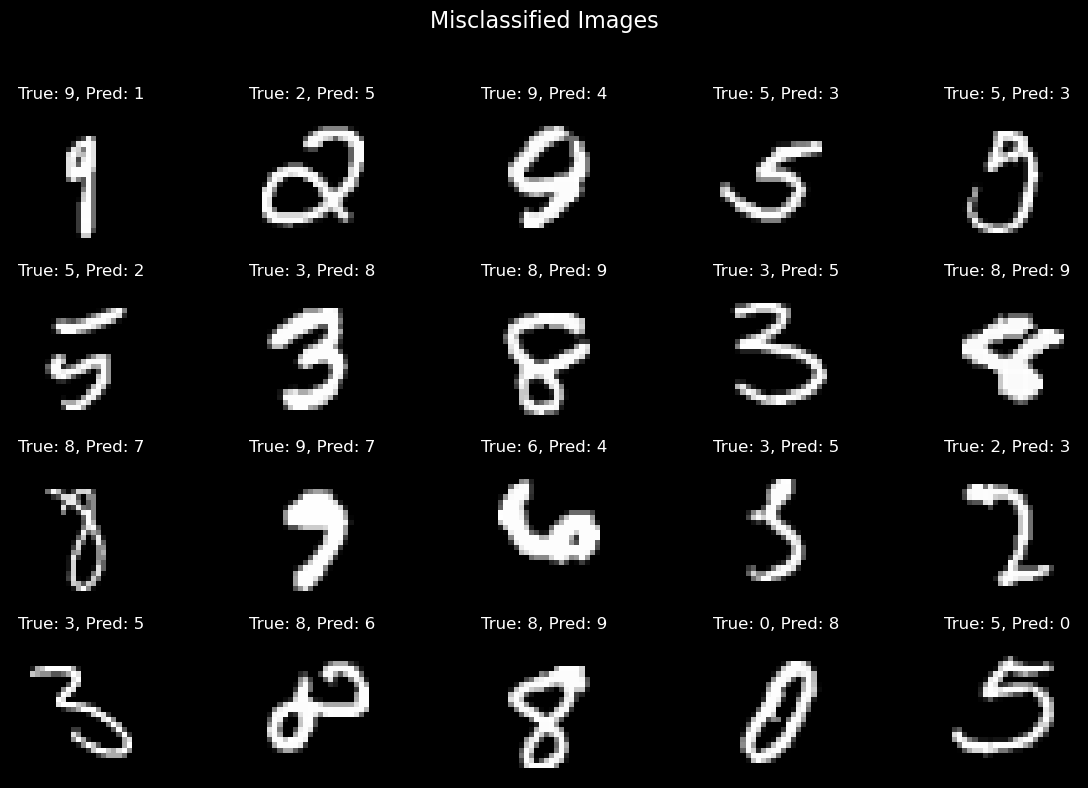

In [10]:
model.eval() 

misclassified_images = []
misclassified_labels_true = []
misclassified_labels_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        
        misclassified_idx = (predicted != labels)  # Find indices where the predictions are incorrect
        
        # Collect misclassified images, true labels, and predicted labels
        misclassified_images.extend(images[misclassified_idx])
        misclassified_labels_true.extend(labels[misclassified_idx])
        misclassified_labels_pred.extend(predicted[misclassified_idx])

# Limit the number of misclassified images to fit within 4x5 subplot grid
num_misclassified = min(len(misclassified_images), 20)

plt.figure(figsize=(12, 8))
for i in range(num_misclassified):
    plt.subplot(4, 5, i + 1)
    plt.imshow(misclassified_images[i][0], cmap='gray')
    plt.title(f'True: {misclassified_labels_true[i]}, Pred: {misclassified_labels_pred[i]}')
    plt.axis('off')

plt.suptitle('Misclassified Images', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()